## Python set-up

In [19]:
# Lib imports
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from datetime import datetime

# Local imports
from abs_data_capture import (
    AbsLandingPage,
    get_abs_data,
    create_selector_series_dataframe,
    create_all_series_dataframe,
    clear_cache,
    metacol
)

# Clearing cache data from 
clear_cache()

## Get data from ABS

In [2]:
LANDING_PAGE_LABOUR_FORCE = AbsLandingPage(
    theme="labour",
    parent_topic="employment-and-unemployment",
    topic="labour-force-australia",
)

LANDING_PAGE_JOB_VACANCIES = AbsLandingPage(
    theme="labour",
    parent_topic="employment-and-unemployment",
    topic="job-vacancies-australia",
)

In [3]:
def grab_data(
    landing_page: AbsLandingPage,
    zip_table: int = 0,
    verbose: bool = False,
    inspect:str = "",
) -> tuple[dict, str, dict, pd.Timestamp, list[None | pd.Timestamp], tuple[str, str]]:
    """Get ABS data"""
    
    abs_dict_ = get_abs_data(
        landing_page=landing_page, 
        zip_table=zip_table, 
        verbose=verbose,
        inspect=inspect,
    )

    return abs_dict_

abs_dict_lf = grab_data(LANDING_PAGE_LABOUR_FORCE)
abs_dict_jv = grab_data(LANDING_PAGE_JOB_VACANCIES)

## Getting Dataframe with ABS Info

In [9]:
labour_trend = {
        "1": metacol.table,
        "Persons": metacol.did,
        "Trend":metacol.stype
    }

labour_sa = {
        "1": metacol.table,
        "Persons": metacol.did,
        "Seasonally Adjusted":metacol.stype
    }

underemployment_trend = {
        "22": metacol.table,
        "A85256589V": metacol.id,
    }

underemployment_sa = {
        "22": metacol.table,
        "A85255725J": metacol.id,
    }

In [10]:
df_labour_trend = create_selector_series_dataframe(abs_dict_lf, labour_trend)
df_labour_sa = create_selector_series_dataframe(abs_dict_lf, labour_sa)
df_job_vacancy = create_all_series_dataframe(abs_dict_jv)
df_under_trend = create_selector_series_dataframe(abs_dict_lf,underemployment_trend)
df_under_sa = create_selector_series_dataframe(abs_dict_lf,underemployment_sa)
df_labour_trend.index = df_labour_trend.index.to_timestamp()
df_labour_sa.index = df_labour_sa.index.to_timestamp()
df_job_vacancy.index = df_job_vacancy.index.to_timestamp()
df_under_trend.index = df_under_trend.index.to_timestamp()
df_under_sa.index = df_under_sa.index.to_timestamp()


## Getting Plots for PDF

In [24]:
# Use a relative path for the PDF
pdf_path = 'Labour_Market_Report.pdf'
pdf = PdfPages(pdf_path)

In [25]:
# Figure 1: Labour Market Summary
# Creating the plot with specified dimensions
fig, ax1 = plt.subplots(figsize=(14, 8))

# Adding a page title above the plot
fig.suptitle('Figure 1: Labour Market, Summary', fontsize=16, fontweight='bold', y=0.95)

# Plotting unemployment rate with a red line
ax1.plot(df_labour_sa.index, df_labour_sa['Unemployment rate'], label='Unemployment Rate', color='tab:red')

# Plotting underemployment rate with a blue line
ax1.plot(df_under_sa.index, df_under_sa['Underemployment rate (proportion of labour force)'], label='Underemployment Rate (Proportion of Labour Force)', color='tab:blue')

# Creating a secondary y-axis for the participation rate
ax2 = ax1.twinx()
ax2.plot(df_labour_sa.index, df_labour_sa['Participation rate'], label='Participation Rate (RHS)', color='tab:green', linestyle='--')

# Setting x-axis and y-axis labels
ax1.set_xlabel('Date')
ax1.set_ylabel('(%)')
ax2.set_ylabel('(%)', color='tab:green')

# Setting a title for the axes
ax1.set_title('Australia Labour Market')

# Formatting the x-axis to show month/year and adjusting interval to display a tick every six months
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))

# Setting x-axis limits to start from a specific date
ax1.set_xlim([datetime(2009, 10, 1), df_labour_sa.index.max()])

# Adding grid lines to the primary axis
ax1.grid(True)

# Rotating x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=90)

# Adding legends for both primary and secondary y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjusting layout to ensure the plot is centered and fits well within an A4 page
plt.tight_layout(pad=2.0)

# Saving the current figure into the PDF and closing the document
pdf.savefig(fig, bbox_inches='tight')

# Displaying the plot
plt.close()

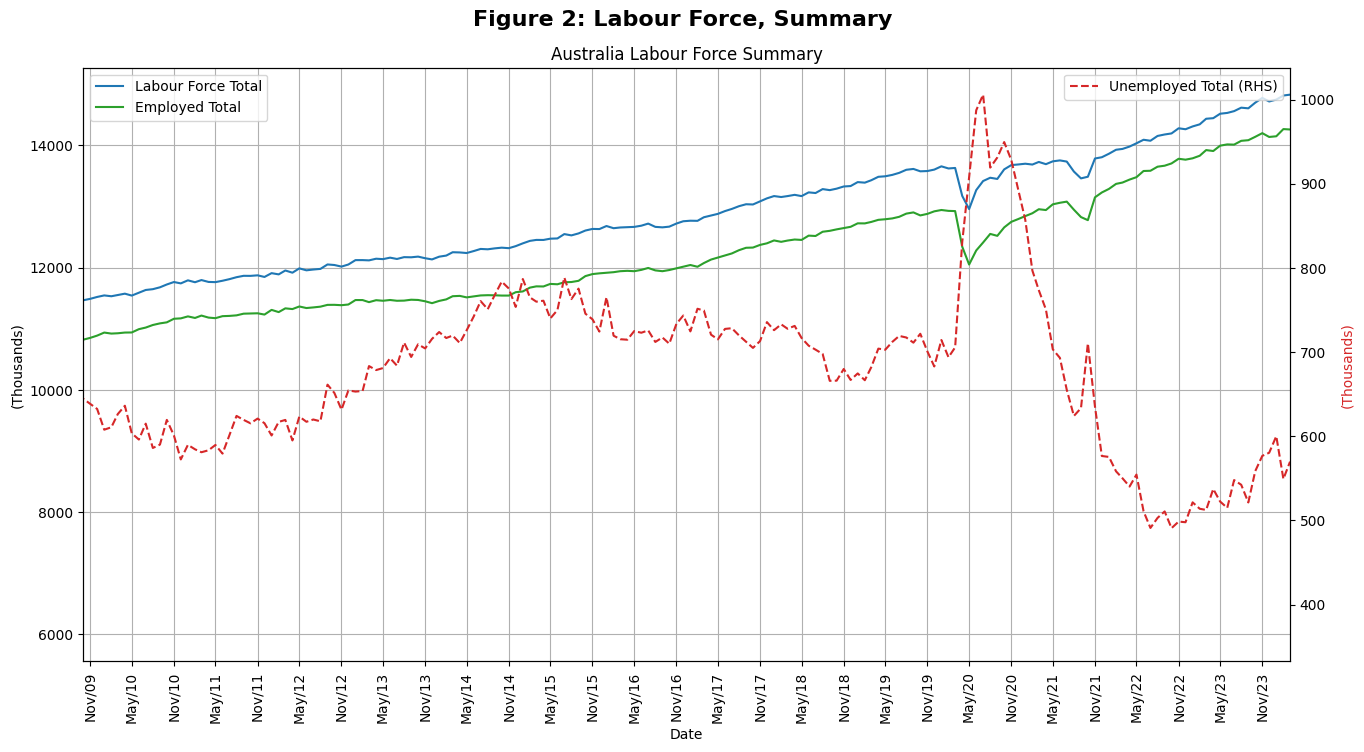

In [28]:
# Figure 2: Labour Force Summary
fig, ax1 = plt.subplots(figsize=(14, 8))

# Add page title
fig.suptitle('Figure 2: Labour Force, Summary', fontsize=16, fontweight='bold', y=0.95)

# Plot total labour force and total employed
ax1.plot(df_labour_sa.index, df_labour_sa['Labour force total'], label='Labour Force Total', color='tab:blue')
ax1.plot(df_labour_sa.index, df_labour_sa['Employed total'], label='Employed Total', color='tab:green')

# Create a second y-axis for total unemployed
ax2 = ax1.twinx()
ax2.plot(df_labour_sa.index, df_labour_sa['Unemployed total'], label='Unemployed Total (RHS)', color='tab:red', linestyle='--')

# Set labels for x and y axes
ax1.set_xlabel('Date')
ax1.set_ylabel('(Thousands)')
ax2.set_ylabel('(Thousands)', color='tab:red')

# Set title for the axes
ax1.set_title('Australia Labour Force Summary')

# Format x-axis to show month/year
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))

# Set x-axis limits
ax1.set_xlim([datetime(2009, 10, 1), df_labour_sa.index.max()])

# Add grid to the main axis
ax1.grid(True)

# Rotate x-axis labels
plt.setp(ax1.get_xticklabels(), rotation=90)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout to ensure the plot is centered and well-fitted on the A4 page
plt.tight_layout(pad=2.0)

# Save the current figure to the PDF and close the document
pdf.savefig(fig, bbox_inches='tight')

# Show the plot
plt.show()


In [27]:
pdf.close()
